**TITLE** - Determine two best markets for our product advertisements

**INTRODUCTION**

The goal of this project is to determine the two best markets (countries) for advertising our on-line coding education products.

The project will use an available dataset from the freeCodeCamp 2017 survey of new coders.  FreeCodeCamp runs Medium, a coding publication with 400,000+ followers, representing various countries and various coding interests.  The survey contains 18K+ responses.  This dataset should provide an adequate sample size for our analysis.  The dataset can be found at https://github.com/freeCodeCamp/2017-new-coder-survey<br><br>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)

In [35]:
df.shape

(18175, 136)

In [4]:
df.head(2)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.set_option('display.max_columns', None)
df.columns.values

<br><br><font color=blue>NOTE:</font>  Reviewed the GitHub repository for further information on these columns.  Replace df to contain only columns on employment, age, country of residence, employment and money spent of programming training.<br><br>

In [37]:
df = df.loc[:, ['NetworkID','Age', 'AttendedBootcamp', 'CountryLive', 'EmploymentField', 'EmploymentFieldOther',
                'EmploymentStatus', 'EmploymentStatusOther','HoursLearning', 'JobInterestBackEnd','JobInterestDataEngr', 
                'JobInterestDataSci', 'JobInterestDevOps','JobInterestFrontEnd', 'JobInterestFullStack','JobInterestGameDev',
                'JobInterestInfoSec', 'JobInterestMobile','JobInterestOther', 'JobInterestProjMngr', 'JobInterestQAEngr',
                'JobInterestUX', 'JobPref', 'JobRoleInterest', 'MoneyForLearning', 'MonthsProgramming' ]].copy()

In [70]:
df.head(2)

,NetworkID,Age,AttendedBootcamp,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,HoursLearning,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRoleInterest,MoneyForLearning,MonthsProgramming
0,6f1fbc6b2b,27.0,0.0,Canada,software development and IT,NaN,Employed for wages,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,150.0,6.0
1,f8f8be6910,34.0,0.0,United States of America,NaN,NaN,Not working but looking for work,NaN,10.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,Full-Stack Web Developer,80.0,6.0


In [38]:
#drop rows where respondent didn't provide a 
#job role interest
df = df.dropna(axis = 'index', 
               subset = ['JobRoleInterest'])
df.shape

(6992, 26)

<br><br>*How many respondents are interested in mobile, web, game development or data science?*

In [ ]:
#value count for all job interests
job_interest = df['JobRoleInterest'].value_counts(normalize = True)
job_interest

<br>*How many times does `JobRoleInterest` have more than one entry?"*

In [ ]:
job_interest_1 = df['JobRoleInterest'].str.extract(r"(\w,)")

In [31]:
ji1_value = job_interest_1.value_counts().sum()/6992*100
print('''{:.1f}% of respondents are interested in more than one 
type of job role'''.format(ji1_value))

68.3% of respondents are interested in more than one 
type of job role


<br>*How many times does `JobRoleInterest` include "[Ww]eb?"*

In [ ]:
job_web = df['JobRoleInterest'].str.extract(r"([Ww]eb)")

In [16]:
job_web.value_counts()

Web    5780
web       1
Name: JobRoleInterest, dtype: int64

<br>*How many times does `JobRoleInterest` include "[Mm]obile?"*

In [ ]:
job_mobile = df['JobRoleInterest'].str.extract(r"([Mm]obile)")

In [19]:
job_mobile.value_counts()

Mobile    2304
mobile       1
Name: JobRoleInterest, dtype: int64

<br>*How many times does JobRoleInterest include "[Gg]ame?"*

In [ ]:
job_games = df['JobRoleInterest'].str.extract(r"([Gg]ame)")

In [21]:
job_games.value_counts()

Game    1628
game       1
Name: JobRoleInterest, dtype: int64

<br>*How many times does JobRoleInterest include "[Dd]ata [Ss]cien?"*

In [ ]:
job_data_sci = df['JobRoleInterest'].str.extract(r"([Dd]ata\s[Ss]cien)")

In [23]:
job_data_sci.value_counts()

Data Scien    1643
Name: JobRoleInterest, dtype: int64

*Create Bar chart showing the % of survey respondents with job interest in Web, Mobile, Game, Data Science*

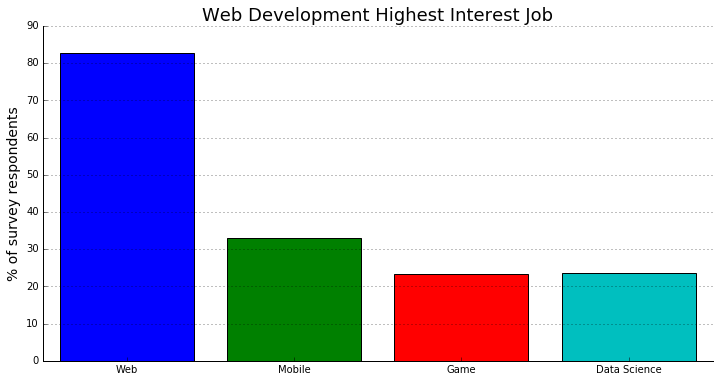

In [9]:
labels = ['Web', 'Mobile', 'Game', 'Data Science']
height = [5781/6992*100, 2305/6992*100,1629/6992*100,
        1643/6992*100]
bar_position = np.arange(len(labels))

fig, ax = plt.subplots(figsize= (12,6))
plt.bar(bar_position,height, tick_label = labels,
        align = "center", color = ['b', 'g', 'r', 'c'])
plt.ylabel('% of survey respondents', fontsize = 14)
plt.grid(which = 'major', axis = 'y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_title("Web Development Highest Interest Job", fontsize = 18)

plt.show()

*Of the categories we have courses for, Web Development is most common job of interest*<br><br>

*Countries where the respondents live*

In [72]:
df['CountryLive'].value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [37]:
df['CountryLive'].value_counts(normalize = True).head(10)

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Brazil                      0.018865
Germany                     0.018280
Australia                   0.016379
Russia                      0.014917
Ukraine                     0.013016
Name: CountryLive, dtype: float64

The US is by far the biggest market, representing almost half of the respondents country of residence. India, the UK and Canada represent 7%, 4.6% and 3.8% respectively.  All other countries are < 2%.<br><br><br>

*Determine how many months the respondents have been programming, replacing 0 months with 1 month*

In [39]:
df['MonthsProgramming'].replace(to_replace =0, value = 1, inplace = True)

In [40]:
#drop null values for MonthsProgramming
df = df[df['MonthsProgramming'].notnull()]
df.shape

(6633, 26)

In [41]:
#money per month spent on learning
df['MoneyperMonth'] = ( df['MoneyForLearning'] 
                       / df['MonthsProgramming']
                      )

In [42]:
df.head(2)

,NetworkID,Age,AttendedBootcamp,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,HoursLearning,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRoleInterest,MoneyForLearning,MonthsProgramming,MoneyperMonth
1,f8f8be6910,34.0,0.0,United States of America,NaN,NaN,Not working but looking for work,NaN,10.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,Full-Stack Web Developer,80.0,6.0,13.333333
2,2ed189768e,21.0,0.0,United States of America,software development and IT,NaN,Employed for wages,NaN,25.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,"Front-End Web Developer, Back-End Web Develo...",1000.0,5.0,200.000000


In [ ]:
df['MoneyperMonth'].value_counts()

In [43]:
#drop rows where respondents didn't provide spending on learning
df = df[df['MoneyperMonth'].notnull()]
df.shape

(6317, 27)

In [44]:
#drop rows where repondendents didn't provide country of residence
df = df[df['CountryLive'].notnull()]
df.shape

(6212, 27)

In [ ]:
df['CountryLive'].value_counts()

In [45]:
c_group_df = df.groupby(by = 'CountryLive', as_index = False)[
    ['CountryLive', 'MoneyperMonth']].mean()
c_group_df.head(2)  #check

,CountryLive,MoneyperMonth
0,Afghanistan,0.000000
1,Albania,7.111111


In [46]:
#money per month for the 4 countries with the most respondents
c_group_bool = (
    (c_group_df['CountryLive']=='United States of America')
    | (c_group_df['CountryLive'] =='India')
    | (c_group_df['CountryLive'] == 'United Kingdom')
    | (c_group_df['CountryLive'] == 'Canada')
    )

c_group_df4 = c_group_df[c_group_bool].sort_values(
    by = 'MoneyperMonth', ascending = False).reset_index(drop = True)
c_group_df4

,CountryLive,MoneyperMonth
0,United States of America,227.997996
1,India,135.100982
2,Canada,113.510961
3,United Kingdom,45.534443


In [47]:
#check code create series MoneyperMonth by CountryLive
canada_bool = df['CountryLive'] == 'Canada'
canada_permonth = df[['CountryLive','MoneyperMonth']][canada_bool]
print(canada_permonth.head(5))

    CountryLive  MoneyperMonth
55       Canada       0.000000
64       Canada      50.000000
89       Canada       1.052632
139      Canada       2.777778
292      Canada       0.000000


In [63]:
#create series of MoneyperMonth for each country
usa_bool = df['CountryLive'] == 'United States of America'
usa_permonth = df[['CountryLive','MoneyperMonth']][usa_bool]

india_bool = df['CountryLive'] == 'India'
india_permonth = df[['CountryLive','MoneyperMonth']][india_bool]

uk_bool = df['CountryLive'] == 'United Kingdom'
uk_permonth = df[['CountryLive','MoneyperMonth']][uk_bool]

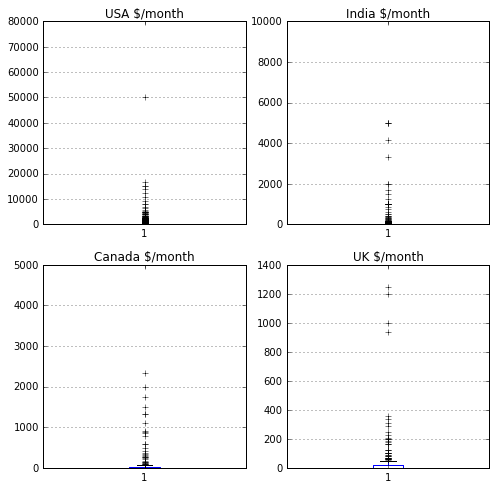

In [68]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.boxplot(usa_permonth['MoneyperMonth'].values)
ax1.set_title('USA $/month')
ax1.grid(axis = 'y')
ax2.boxplot(india_permonth['MoneyperMonth'].values)
ax2.set_title('India $/month')
ax2.grid(axis ='y')
ax3.boxplot(canada_permonth['MoneyperMonth'].values)
ax3.set_title('Canada $/month')
ax3.grid(axis = 'y')
ax4.boxplot(uk_permonth['MoneyperMonth'].values)
ax4.set_title('UK $/month')
ax4.grid(axis = 'y')

plt.show()


In [69]:
#remove outliers
usa_permonth = usa_permonth[usa_permonth['MoneyperMonth'] < 2000]
india_permonth = india_permonth[india_permonth['MoneyperMonth'] < 2000]
canada_permonth = canada_permonth[canada_permonth['MoneyperMonth'] < 1000]
uk_permonth = uk_permonth[uk_permonth['MoneyperMonth'] < 400]

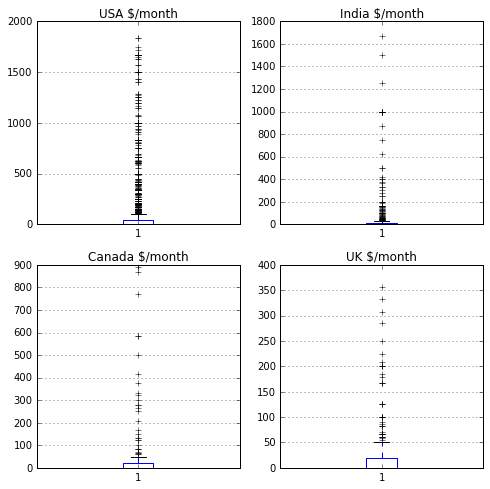

In [70]:
#boxplots with outliers removed
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.boxplot(usa_permonth['MoneyperMonth'].values)
ax1.set_title('USA $/month')
ax1.grid(axis = 'y')
ax2.boxplot(india_permonth['MoneyperMonth'].values)
ax2.set_title('India $/month')
ax2.grid(axis ='y')
ax3.boxplot(canada_permonth['MoneyperMonth'].values)
ax3.set_title('Canada $/month')
ax3.grid(axis = 'y')
ax4.boxplot(uk_permonth['MoneyperMonth'].values)
ax4.set_title('UK $/month')
ax4.grid(axis = 'y')

plt.show()


In [101]:
#recompute means with outliers out
data = {'Country': ['USA', 'India', 'Canada', 'UK'],
       'MoneyperMonth': [usa_permonth['MoneyperMonth'].mean(),
                        india_permonth['MoneyperMonth'].mean(),
                        canada_permonth['MoneyperMonth'].mean(),
                        uk_permonth['MoneyperMonth'].mean()]}
df_out = pd.DataFrame(data = data)
df_out

,Country,MoneyperMonth
0,USA,82.847724
1,India,57.256604
2,Canada,46.934471
3,UK,25.245838


In [105]:
#check adequate number of samples for each country after outliers removed
print('With outliers removed:')
print('USA customers shape:',usa_permonth.shape)
print('India customers shape:',india_permonth.shape)
print('Canada customers shape:',canada_permonth.shape)
print('UK customers shape:',uk_permonth.shape)

With outliers removed:
USA customers shape: (2862, 2)
India customers shape: (455, 2)
Canada customers shape: (232, 2)
UK customers shape: (274, 2)


<font color=red>CONCLUSION</font>

Based on the 1) the number of respondents interested in Web design, 2) `MoneyperMonth` result with outliers removed and 3)the number of respondents from the `shape` results, I conclude that the USA and India are the best markets for our $59/mo education product.